<a href="https://colab.research.google.com/github/Magvride/Spotify-Recommendations/blob/main/Ci%C3%AAncia_de_Dados_G1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Instalação de pacotes necessários




##
  - **Numpy** - **computação numérica** em Python
 - **Pandas** - Manipulação e **análise de dados**
 - **SciPy**- Escossistema para matemática, ciência e engenharia
 - **Matplotlib** - **Visualizações** em Python
 - **Seaborn** - Visualização estatística



In [2]:
import numpy as np
import pandas as pd
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento do Dataset


In [3]:
#Carregar o dataset
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-01-21/spotify_songs.csv'
df = pd.read_csv(url)

In [4]:
#Imprimir primeiras linhas do dataset
print(df.head())

                 track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxu

In [5]:
#Informações geral do dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

#Resumo estatístico do dataset

In [ ]:
print(df.describe())

       track_popularity  danceability        energy           key  \
count      32833.000000  32833.000000  32833.000000  32833.000000   
mean          42.477081      0.654850      0.698619      5.374471   
std           24.984074      0.145085      0.180910      3.611657   
min            0.000000      0.000000      0.000175      0.000000   
25%           24.000000      0.563000      0.581000      2.000000   
50%           45.000000      0.672000      0.721000      6.000000   
75%           62.000000      0.761000      0.840000      9.000000   
max          100.000000      0.983000      1.000000     11.000000   

           loudness          mode   speechiness  acousticness  \
count  32833.000000  32833.000000  32833.000000  32833.000000   
mean      -6.719499      0.565711      0.107068      0.175334   
std        2.988436      0.495671      0.101314      0.219633   
min      -46.448000      0.000000      0.000000      0.000000   
25%       -8.171000      0.000000      0.041000      

#Medidas de tendencia central




## **Moda** para variables categoricas

In [ ]:
#Criação de uma lista com as columnas que quermos saber as medidas de tendencia central
#Se seleccionaron las variables que hacian mas sentido conocer la T.C
features = ['track_name', 'track_artist', 'playlist_genre', 'track_album_name']

###Um jeito de conhecer a moda de diferentes variaveis **.mode()**

In [ ]:
for feature in features:
  moda_val = df[feature].mode()[0]
  print()
  print(f"A moda do atributo {feature} é {moda_val}")


A moda do atributo track_name é Poison

A moda do atributo track_artist é Martin Garrix

A moda do atributo playlist_genre é edm

A moda do atributo track_album_name é Greatest Hits


###Jeito de conhecer a moda com função **.value_counts()**

In [ ]:
print(df["track_name"].value_counts().idxmax())
print(df['track_name'].value_counts().max())

Poison
22


##**Mediana** e **media** para variaveis numericas

In [ ]:
featuresNumericas = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

for featureNumerica in featuresNumericas:
  media_val= df[featureNumerica].median()
  print()
  print(f"A media de {featureNumerica} é {media_val}")
  mediana_val = df[featureNumerica].mean()
  print(f"A mediana de {featureNumerica} é {mediana_val}")



A media de danceability é 0.672
A mediana de danceability é 0.6548495202996985

A media de energy é 0.721
A mediana de energy é 0.6986192707032558

A media de key é 6.0
A mediana de key é 5.374470806810222

A media de loudness é -6.166
A mediana de loudness é -6.719499131970883

A media de mode é 1.0
A mediana de mode é 0.5657113270185484

A media de speechiness é 0.0625
A mediana de speechiness é 0.10706806871135749

A media de acousticness é 0.0804
A mediana de acousticness é 0.1753337150793409

A media de instrumentalness é 1.61e-05
A mediana de instrumentalness é 0.08474716133310999

A media de liveness é 0.127
A mediana de liveness é 0.19017619529132274

A media de valence é 0.512
A mediana de valence é 0.5105609737154692

A media de tempo é 121.984
A mediana de tempo é 120.88113154448268

A media de duration_ms é 216000.0
A mediana de duration_ms é 225799.811622453


##Graficos de tendencia central


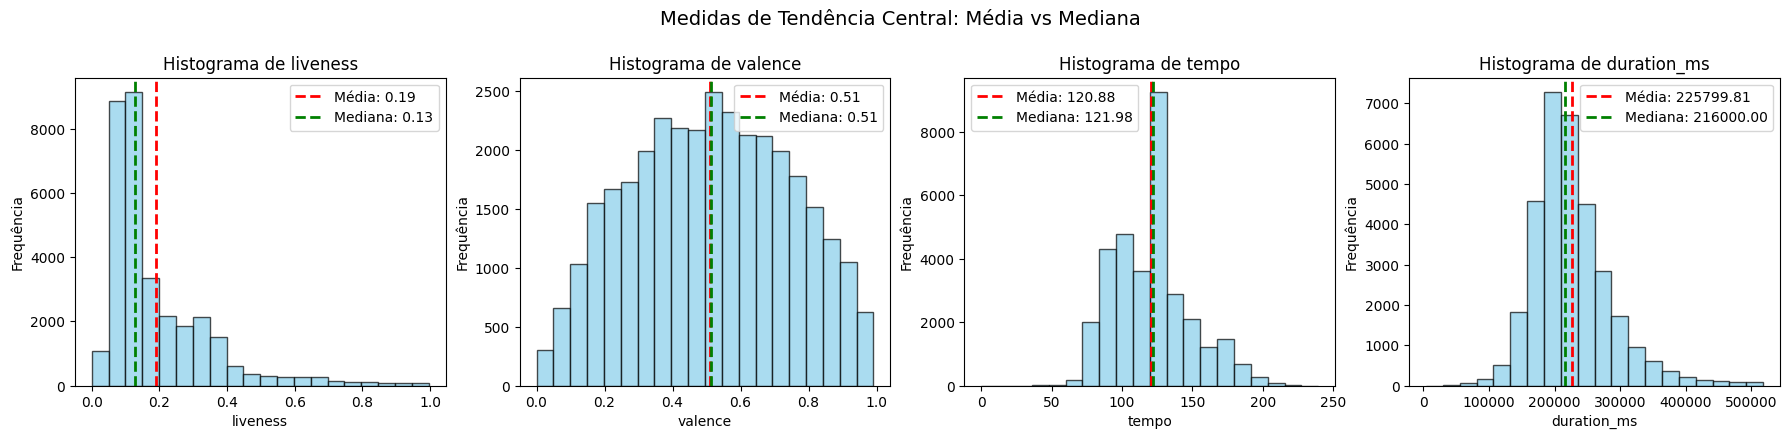

In [ ]:
featuresNumericas1 = ['liveness', 'valence', 'tempo', 'duration_ms']
fig, axes = plt.subplots(1, 4, figsize=(22, 4))
fig.suptitle('Medidas de Tendência Central: Média vs Mediana', fontsize=14, y=1.05)

for idx, feature in enumerate(featuresNumericas1):
    ax = axes[idx]
    # Histograma
    ax.hist(df[feature], bins=20, alpha=0.7, color='skyblue', edgecolor='black')

    #Definir valores de media y mediana para no caer en el error de tener el mismo
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    #Definir lineas que pasen por los histogramas
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Média: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Mediana: {median_val:.2f}')
    ax.legend() #colocar cuadrito indicando los valores

    #colocar titulo, nombre en x, nombre en y
    ax.set_xlabel(feature)
    ax.set_ylabel('Frequência')
    ax.set_title(f'Histograma de {feature}')


#Medidas de dispersão

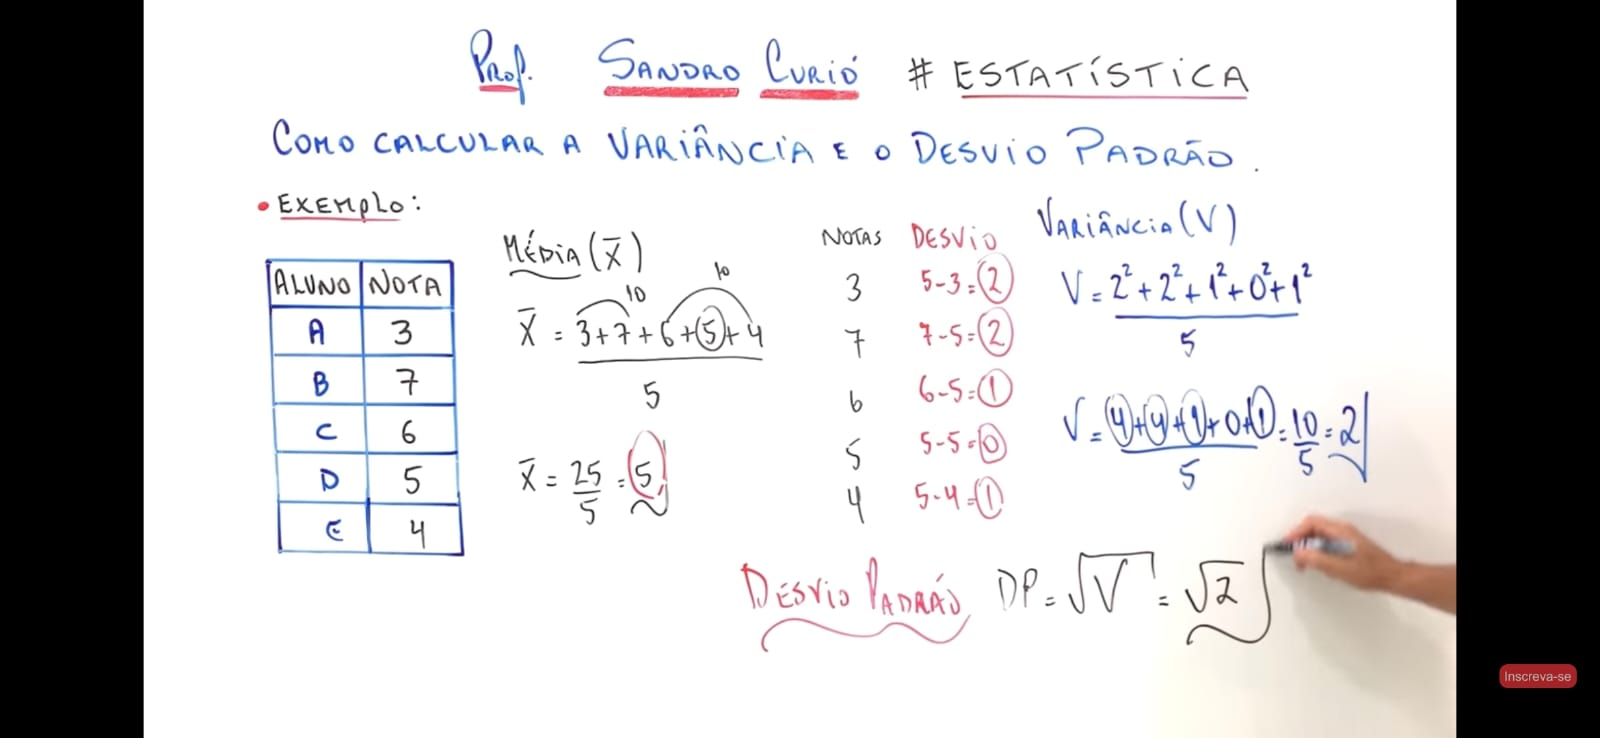

### Amplitude, Variância, Desvio Padrão e Coeficiente de Variação

> **Amplitude**: Diferença entre o maior e menor valor. Medida simples que indica o alcance total dos dados, mas muito sensível a outliers.
>
> **Variância**: Média dos quadrados dos desvios em relação à média. Mede o quão espalhados estão os dados, mas em unidades quadradas.

**Cuanto mayor sea la varianza mayor dispersión existirá y por tanto, menor representatividad tendrá la media aritmética**

Datos de temperatura en una ciudad

20, 10, 30  media  20  dispersión 3,16

---


20  20  20  media  20  dispersión 0

---


30  10  10  media  20  dispersion 3,8729

---



La media es la misma, pero claramente la variación de temperatura en esa ciudad
es totalmente inestable en el caso 3 y estable en el caso 2.

>
> **Desvio Padrão**: Raiz quadrada da variância. Indica o quanto os dados se desviam da média, na mesma unidade dos dados originais. Regra empírica: ~68% dos dados estão dentro de ±1 desvio padrão.
>
> **Coeficiente de Variação**: Razão entre desvio padrão e média (em %). Permite comparar variabilidade entre variáveis com diferentes escalas. CV < 10% indica baixa variabilidade.

In [15]:
features = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
for feature in features:
  print(f'{feature}')
  print(f"Desvio padrão : {df[feature].std()}")
  print(f"Varianza : {df[feature].var()}")
  print(f"Media : {df[feature].mean()}")
  print(f"Amplitude : {df[feature].max()-df[feature].min()}")
  print(f"CV : {df[feature].std()/df[feature].mean()}")
  print("\n")

danceability
Desvio padrão : 0.14508532044765107
Varianza : 0.021049750209397596
Media : 0.6548495202996985
Amplitude : 0.983
CV : 0.22155520612010424


energy
Desvio padrão : 0.18091003391959035
Varianza : 0.032728440372787326
Media : 0.6986192707032558
Amplitude : 0.999825
CV : 0.2589536840824326


key
Desvio padrão : 3.611657409603391
Varianza : 13.044069244343076
Media : 5.374470806810222
Amplitude : 11
CV : 0.6720024239459828


loudness
Desvio padrão : 2.9884363863324013
Varianza : 8.93075203515546
Media : -6.719499131970883
Amplitude : 47.723
CV : -0.4447409438768495


mode
Desvio padrão : 0.49567076220654116
Varianza : 0.24568950450641347
Media : 0.5657113270185484
Amplitude : 1
CV : 0.8761902732597914


speechiness
Desvio padrão : 0.1013141315112824
Varianza : 0.010264553243885425
Media : 0.10706806871135749
Amplitude : 0.918
CV : 0.9462590736031019


acousticness
Desvio padrão : 0.21963254030407992
Varianza : 0.04823845276042329
Media : 0.1753337150793409
Amplitude : 0.994
CV 

## Problema 1 : Speechiness

A continuación para entender que nos quiere decir las medidas de dispersión, se realizó una comparación para la variable **Speechiness** en la canción más escuchada, para entender cual seria el valor de Speechiness más frecuente.

Sin embargo se está teniendo una contradicción porque el valor de **Speechiness** está siendo diferente para la misma canción, lo que genera una duda en cuanto a la consistencia de los datos dentro del contexto de la música.

###Marco Teorico de la variables **Speechiness**

🎵 Speechiness mide qué tanto una canción se parece a la habla (voz hablada).

🔹 Cerca de 1.0 → casi todo es hablado (ej: audiolibro, podcast, charla, poesía).

🔹 Entre 0.33 y 0.66 → mezcla de música y partes habladas (ej: rap, canciones con recitados o secciones habladas).

🔹 Menos de 0.33 → es principalmente música, con muy poca o nada de voz hablada.

👉 O sea: cuanto más alto es el valor de speechiness, más “parecida a hablar” es la pista; cuanto más bajo, más es música “tradicional”.

In [24]:
df.loc[df['track_name']=='Poison', 'speechiness']

,speechiness
2242,0.0542
6751,0.2660
10304,0.0455
12250,0.1090
12863,0.1090
13078,0.1090
13304,0.1170
14955,0.1090
15280,0.1170
15396,0.1090


###**Solución**

El posible motivo por el cual **Speechiness** sea diferente siendo la misma canción, es porque es **interpretada por artistas diferentes, lo cual genera un cambio en esta variable**



In [9]:
Posion_dataFrame = df[df["track_name"] == "Poison"][["track_name","track_artist","speechiness"]]
print(Posion_dataFrame)
print(Posion_dataFrame.info())

      track_name      track_artist  speechiness
2242      Poison          Rita Ora       0.0542
6751      Poison  Sidhu Moose Wala       0.2660
10304     Poison            Coopex       0.0455
12250     Poison      Alice Cooper       0.1090
12863     Poison      Alice Cooper       0.1090
13078     Poison      Alice Cooper       0.1090
13304     Poison      Alice Cooper       0.1170
14955     Poison      Alice Cooper       0.1090
15280     Poison      Alice Cooper       0.1170
15396     Poison      Alice Cooper       0.1090
21765     Poison      Brent Faiyaz       0.0650
23176     Poison            Coopex       0.0455
23192     Poison             Awich       0.1350
24061     Poison    Bell Biv DeVoe       0.2100
24126     Poison    Bell Biv DeVoe       0.1920
24268     Poison    Bell Biv DeVoe       0.2030
24420     Poison    Bell Biv DeVoe       0.2100
24482     Poison    Bell Biv DeVoe       0.2280
24683     Poison    Bell Biv DeVoe       0.2160
24787     Poison    Bell Biv DeVoe      

**Conclusión**

1. La variable Speechiness **puede llegar a depender del artista**, no depende unicamente de la canción.
2. Una misma canción puede tener un **Speechiness** diferente

**Consideraciones futuras**
1.Si la variable depende del artista, eso quiere decir que al momento de crear una solicitud de recomendación dependiendo de la **musica**, se tiene que considerar que va a depender también del artista que interpreta.

Ejemplo

El hecho que a mi me guste la canción *Corazón Partido del Grupo menos é mais*, no quiere decir que me guste la misma canción *Corazón partido de Alejandro Sanzs*.

###Visualización del concepto de desvio padrao

**Speechiness** mide la proporción de voz hablada dentro de la canción, en una escala de 0 a 1.

media 0.1336818181818182
Desviación estandar 0.07115036148463295
Coeficiente de variación 53.22366381033405


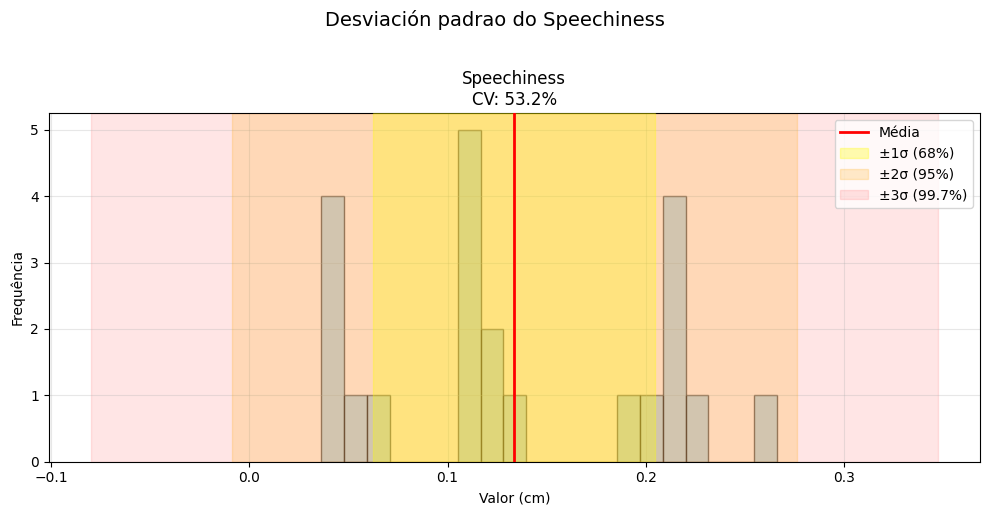

In [11]:
fig, ax= plt.subplots(1,1,figsize=(10,5))
fig.suptitle("Desviación padrao do Speechiness", fontsize=14, y=1.02)
feature= 'speechiness'
mean = Posion_dataFrame[feature].mean()
std = Posion_dataFrame[feature].std()
cv = (std/mean) * 100

print(f"media {mean}")
print(f"Desviación estandar {std}")
print(f"Coeficiente de variación {cv}")
count, bins, patches = ax.hist(Posion_dataFrame[feature], bins=20, alpha=0.5, color='skyblue', edgecolor='black')
# Linha da média
ax.axvline(mean, color='red', linewidth=2, label='Média', zorder=5)
# Faixas de desvio padrão
ax.axvspan(mean-std, mean+std, alpha=0.3, color='yellow', label='±1σ (68%)', zorder=3)
ax.axvspan(mean-2*std, mean+2*std, alpha=0.2, color='orange', label='±2σ (95%)', zorder=2)
ax.axvspan(mean-3*std, mean+3*std, alpha=0.1, color='red', label='±3σ (99.7%)', zorder=1)

ax.set_title(f'{feature.replace("_", " ").title()}\nCV: {cv:.1f}%')
ax.set_xlabel('Valor (cm)')
ax.set_ylabel('Frequência')
ax.legend(fontsize=10, loc='upper right')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


###Interpretación dos dados

Cada unos de los intervalos coloridos representa las diferentes concentraciones de los datos. Al momento de hacer la suma de las frecuencias, se percibe que tenemos un total de 22 canciones con nombre "Poison", donde, la mayoría de ellas se encuentra en un speechiness entre los valores de ~0.06 y ~0.2.

Explicación por si no recordamos la desviación

La media de Speechiness de la canción Poison es de 0.13, mientras que la desviación estandar es de 0.07, eso quiere decir que una desviación estándar a la derecha es de 0.2 y una desviación estándar a la izquierda es de 0.06.

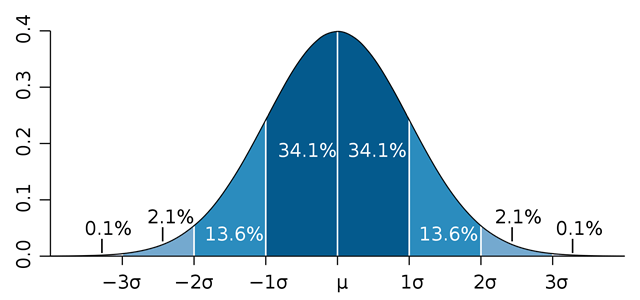


Como podría esto ayudarnos a futuro en el proyecto?

El hecho de reconocer que una misma canción tenga un speechiness variable, ayuda a reconocer que la probabilidad de una persona gustar de una canción **NO depende únicamente de la canción, sino también de las características que acompanhan la canción** , donde al momento de implementar el modelo podriamos solo considerar el 68% de la media de speechiness de una canción para tener mas probabilidades de acertar.

##Problema 2 : Danceability